In [65]:
# Este programa ejecuta una simulación de trayectoria del precio de las acciones durante los próximos 252 días de negociación (o un año de negociación) para las acciones de XXX, basado en una 
# distribución de probabilidad normal de los rendimientos diarios promedio históricos derivados de la media y la desviación estándar de la muestra.
import os
import numpy as np
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [66]:
from dotenv import load_dotenv
load_dotenv("env.txt")

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)
load_dotenv("env.txt")

True

In [67]:
ticker = "LCID"

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 4 years from Today
start_date = pd.Timestamp("2020-04-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-04-04", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for AAPL
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-09-18 04:00:00+00:00,10.25,10.250,9.8200,9.89,564328,463,9.905086
2020-09-21 04:00:00+00:00,9.90,9.960,9.8600,9.86,762763,3027,9.909600
2020-09-22 04:00:00+00:00,9.96,9.960,9.8500,9.88,1280789,1506,9.871129
2020-09-23 04:00:00+00:00,9.90,9.905,9.7901,9.85,192570,655,9.864035
2020-09-24 04:00:00+00:00,9.85,9.850,9.7500,9.77,605537,633,9.818596


In [68]:
ticker_data = pd.concat([ticker_data], axis=1, keys=["LCID"])
ticker_data.head()

LCID                                             \
                            open    high     low close   volume trade_count   
timestamp                                                                     
2020-09-18 04:00:00+00:00  10.25  10.250  9.8200  9.89   564328         463   
2020-09-21 04:00:00+00:00   9.90   9.960  9.8600  9.86   762763        3027   
2020-09-22 04:00:00+00:00   9.96   9.960  9.8500  9.88  1280789        1506   
2020-09-23 04:00:00+00:00   9.90   9.905  9.7901  9.85   192570         655   
2020-09-24 04:00:00+00:00   9.85   9.850  9.7500  9.77   605537         633   

                                     
                               vwap  
timestamp                            
2020-09-18 04:00:00+00:00  9.905086  
2020-09-21 04:00:00+00:00  9.909600  
2020-09-22 04:00:00+00:00  9.871129  
2020-09-23 04:00:00+00:00  9.864035  
2020-09-24 04:00:00+00:00  9.818596

In [69]:
cantidad_simulaciones = 1000
# simular el daily return basado en 500 simulaciones
MC_LCID = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = cantidad_simulaciones,
    num_trading_days = 252)

In [70]:
MC_LCID.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 450.
Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 500.
Running Monte Carlo simulation number 510.
Running Monte Carlo simulation number 520.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 530.
Running Monte Carlo simulation number 540.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 550.
Running Monte Carlo simulation number 560.
Running Monte Carlo simulation number 570.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 580.
Running Monte Carlo simulation number 590.
Running Monte Carlo simulation number 600.
Running Monte Carlo simulation number 610.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 620.
Running Monte Carlo simulation number 630.
Running Monte Carlo simulation number 640.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 650.
Running Monte Carlo simulation number 660.
Running Monte Carlo simulation number 670.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 680.
Running Monte Carlo simulation number 690.
Running Monte Carlo simulation number 700.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 710.
Running Monte Carlo simulation number 720.
Running Monte Carlo simulation number 730.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 740.
Running Monte Carlo simulation number 750.
Running Monte Carlo simulation number 760.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 770.
Running Monte Carlo simulation number 780.
Running Monte Carlo simulation number 790.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 800.
Running Monte Carlo simulation number 810.
Running Monte Carlo simulation number 820.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 830.
Running Monte Carlo simulation number 840.
Running Monte Carlo simulation number 850.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 860.
Running Monte Carlo simulation number 870.
Running Monte Carlo simulation number 880.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 890.
Running Monte Carlo simulation number 900.
Running Monte Carlo simulation number 910.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 920.
Running Monte Carlo simulation number 930.
Running Monte Carlo simulation number 940.
Running Monte Carlo simulation number 950.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 960.
Running Monte Carlo simulation number 970.
Running Monte Carlo simulation number 980.
Running Monte Carlo simulation number 990.


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.964091,0.991213,0.984032,1.028177,1.031476,1.066544,0.957955,0.957521,0.982907,1.032431,...,1.041878,1.013491,1.006621,1.007355,0.976205,1.019776,1.023800,1.060710,1.032058,0.869074
2,1.001688,0.843817,1.030503,1.051845,1.101845,0.958769,0.849881,0.990166,0.930450,1.067779,...,1.047778,1.016711,1.110947,1.091230,0.994389,0.994209,0.991502,0.967510,0.888650,0.892942
3,0.948344,0.804412,0.956878,1.020585,1.026734,0.975774,0.826323,0.968689,1.002878,1.040265,...,1.085255,0.966738,1.214426,1.084639,0.926413,1.052263,0.902411,1.029523,0.909687,0.805818
4,1.020981,0.722576,0.929449,1.058510,1.031940,0.957660,0.896938,0.964051,1.164533,1.114340,...,1.096681,0.931850,1.270463,1.110844,0.922560,1.146163,0.887981,1.067339,0.911664,0.791937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.831494,0.573216,0.496069,0.236860,0.099751,0.698358,1.606276,0.126653,0.526819,3.021925,...,1.155688,0.355628,0.322843,0.761441,4.020059,1.076103,1.568156,0.367955,1.371771,0.564481
249,0.912708,0.587105,0.422125,0.223682,0.092444,0.660945,1.574882,0.131245,0.571721,3.095664,...,1.180249,0.379899,0.360184,0.771450,4.003993,1.110277,1.462294,0.345108,1.334030,0.569000
250,0.837400,0.691397,0.403189,0.210490,0.097766,0.676700,1.656146,0.134748,0.570267,3.065013,...,1.249925,0.362155,0.333667,0.837602,3.754800,1.017329,1.354857,0.376328,1.407290,0.581640
251,0.851512,0.733072,0.430016,0.224842,0.091597,0.667706,1.879786,0.145388,0.597441,2.740983,...,1.256415,0.399451,0.355962,0.903188,3.849001,1.018279,1.333464,0.402788,1.358349,0.581977


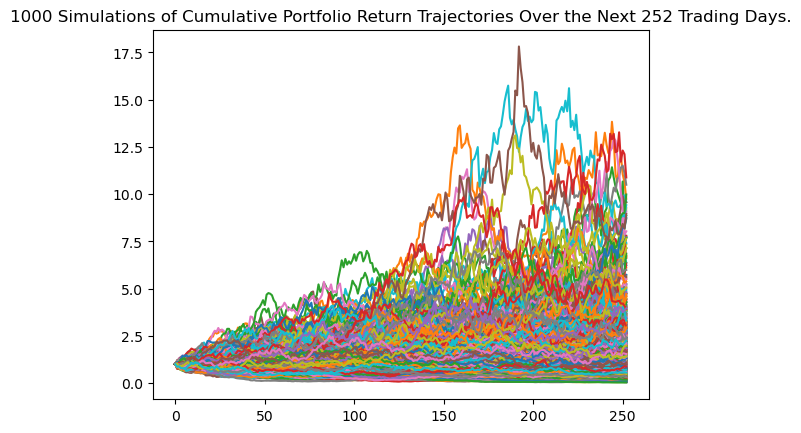

In [71]:
# 1000 Simulaciones de Rendimiento diario a lo largo de 1 ano
MC_LCID.plot_simulation();

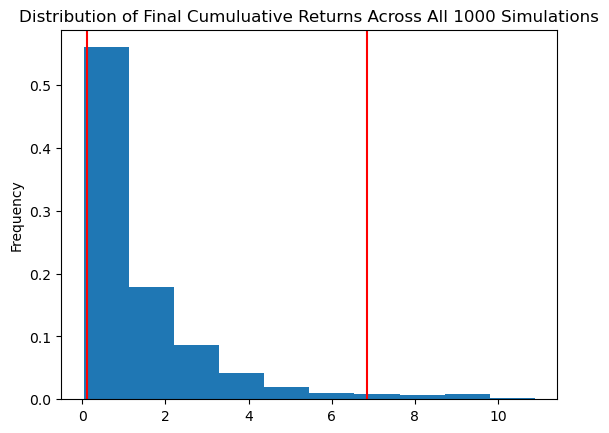

In [72]:
# Muestra los cambios a los largo de 1 ano y su frecuencia
MC_LCID.plot_distribution();

In [73]:
# Calcula un resumen de estadistica obtenido de las simulaciones de daily returns
simulated_returns_data = {
    "mean": list(MC_LCID.simulated_return.mean(axis=1)),
    "median": list(MC_LCID.simulated_return.median(axis=1)),
    "min": list(MC_LCID.simulated_return.min(axis=1)),
    "max": list(MC_LCID.simulated_return.max(axis=1))}

df_simulated_returns = pd.DataFrame(simulated_returns_data)
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999012,0.998955,0.756225,1.225125
2,0.998857,0.994804,0.762228,1.329565
3,1.000967,0.999866,0.704683,1.394693
4,1.005306,1.000079,0.664017,1.467477


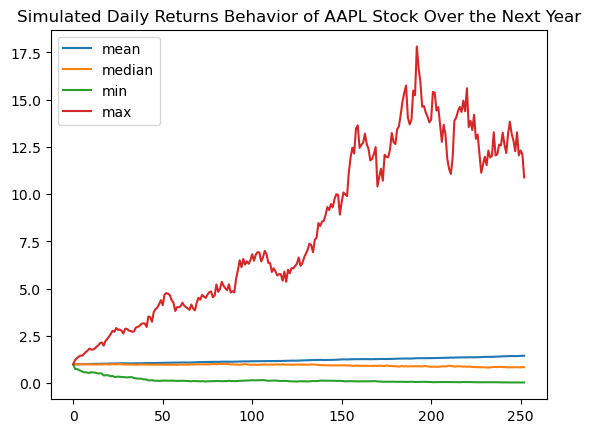

In [74]:
# Simula los Profits / Losses 
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of AAPL Stock Over the Next Year");

In [75]:
# Calcula la simulacion de Profits/Loses con una inversion de $10,000 de LCID sobre los siguientes 252 trading days
initial_investment = 10000
cumulative_pnl = initial_investment * df_simulated_returns
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,9990.124001,9989.548434,7562.252560,12251.245884
2,9988.567891,9948.038776,7622.278468,13295.647666
3,10009.672067,9998.658526,7046.826971,13946.930217
4,10053.055427,10000.791401,6640.173266,14674.772412


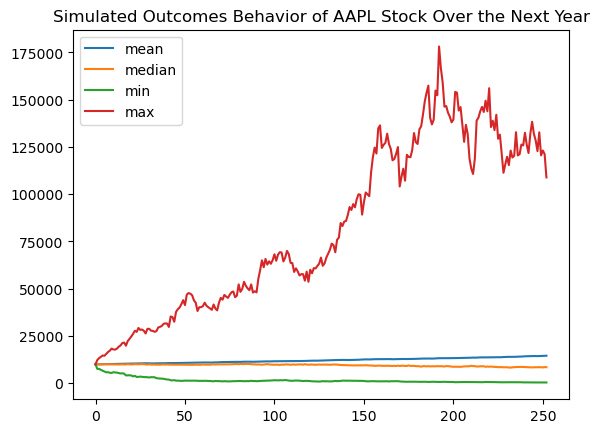

In [76]:
# Calcula la simulacion de Profits/Loses con una inversion de $10,000 de LCID sobre los siguientes 252 trading days
cumulative_pnl.plot(title="Simulated Outcomes Behavior of AAPL Stock Over the Next Year");

In [77]:
# Calcula el rango de posibles resultados de una inversion de $10,000 en LCID stocks
tbl = MC_LCID.summarize_cumulative_return()
print(tbl)

count           1000.000000
mean               1.455042
std                1.679140
min                0.039828
25%                0.442503
50%                0.847384
75%                1.798621
max               10.887475
95% CI Lower       0.107796
95% CI Upper       6.859020
Name: 252, dtype: float64


C:\Users\miyak\OneDrive\Desktop\RUT-VIRT-FIN-PT-03-2023-U-LOLC\Activities\05-APIs\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Solved\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [78]:
# 
lower = round(tbl[8]*10000,2)
upper = round(tbl[9]*10000,2)
print(f"Aqui hay un 95% de chances que tu invercion inicial de: $10,000 en el portafolio de el ano siguiente pueda terminar en el rango de:" f" ${lower} and ${upper}.")

Aqui hay un 95% de chances que tu invercion inicial de: $10,000 en el portafolio de el ano siguiente pueda terminar en el rango de: $1077.96 and $68590.2.
